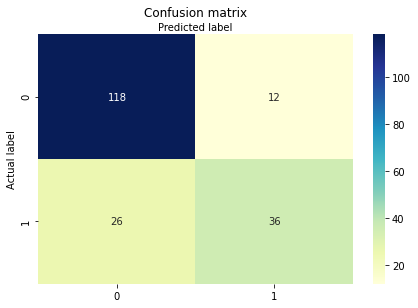

Accuracy: 0.8020833333333334
Precision: 0.75
Recall: 0.5806451612903226


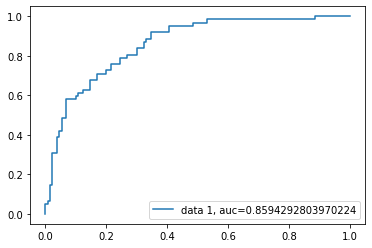

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time


data_path = '/content/drive/MyDrive/Colab/Logistic regression/diabetes.csv'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data = pd.read_csv(data_path, header= 0, names = col_names)
data.head()

# Input dữ liêu
feature_col = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
# label_col = ['label']
x = data[feature_col]
y = data.label

# Chia ra 25% cho test data, 75% cho train data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

# Thực hiện việc fit model
logreg = LogisticRegression(max_iter=1000)

logreg.fit(x_train,y_train)

y_pred=logreg.predict(x_test)

# Dùng confusion matrix để viluslize dữ liệu sau khi fit model
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# Vẽ confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Dự đoán độ chính xác của model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

# Vẽ hàm ROC
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()